In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans ,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import numpy as np

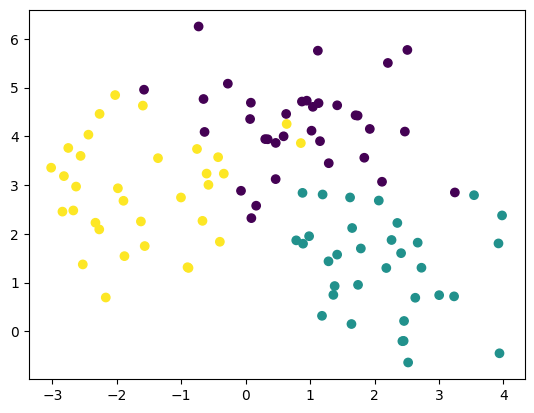

In [ ]:
# demo data generation
X, y = make_blobs(n_samples=100, centers=3, random_state=0)
# Plot the data points with different colors for each cluster
plt.scatter(X[:, 0], X[:, 1], c=y)  # X[:, 0] is first feature, X[:, 1] is second feature

In [ ]:
def kmeans_clustering(data, k):
   kmeans = KMeans(n_clusters=k, random_state=42)
   labels = kmeans.fit_predict(data)
   return labels

In [ ]:
def plot_base_solution(base_cluster_solutions):
  plt.figure(figsize=(15, 4))
  for i, labels in enumerate(base_cluster_solutions, 1):
      plt.subplot(1, len(base_cluster_solutions), i)
      plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
      plt.title(f'Base Clustering Solution {i}')

  plt.tight_layout()
  plt.show()


In [ ]:
base_cluster_solutions = []
k_values = [2, 3, 4] # no. of base clustering solution with different k
for k in k_values:
  base_cluster_solutions.append(kmeans_clustering(X, k))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


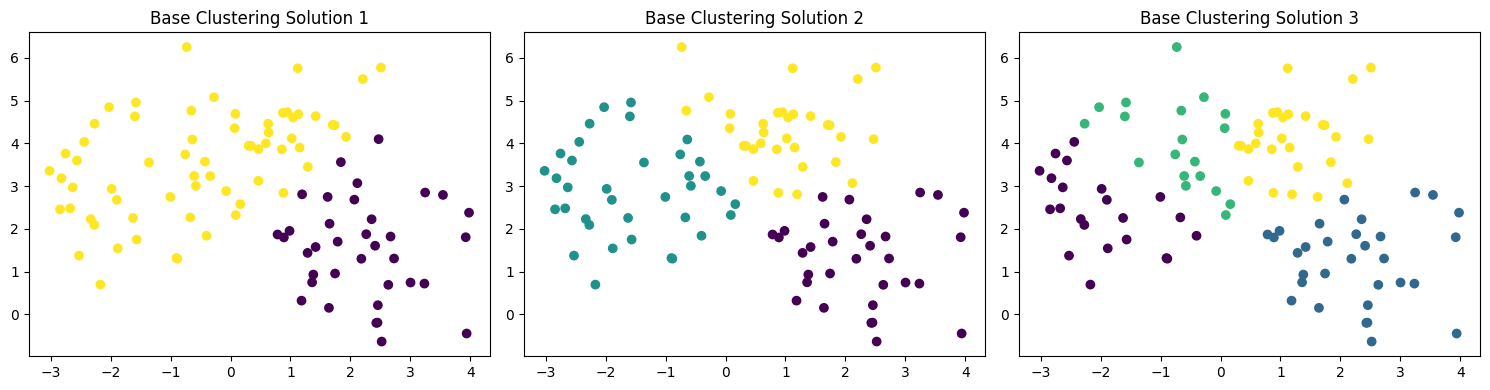

In [ ]:
plot_base_solution(base_cluster_solutions)

In [ ]:
def calculate_co_association(base_cluster_solutions):

  n_data =  len(base_cluster_solutions[0])
  n_clusters =  len(base_cluster_solutions)

  # Create the co-association matrix
  co_assoc_matrix = np.zeros((n_data, n_data))

  co_assoc_matrix = np.zeros((n_data, n_data))
  for i in range(n_data):
      for j in range(i, n_data):
          val = sum(base_cluster_solutions[k][i] == base_cluster_solutions[k][j] for k in range(n_clusters))
          co_assoc_matrix[i][j] = co_assoc_matrix[j][i] = val

  # normalize
  co_assoc_matrix = co_assoc_matrix / n_clusters

  return co_assoc_matrix

In [ ]:
# co-association matrix calculation
co_assoc_matrix = calculate_co_association(base_cluster_solutions)

print("Co-association Matrix:")
print(co_assoc_matrix)


Co-association Matrix:
[[1.         0.         1.         ... 0.33333333 0.         0.        ]
 [0.         1.         0.         ... 0.33333333 0.33333333 0.33333333]
 [1.         0.         1.         ... 0.33333333 0.         0.        ]
 ...
 [0.33333333 0.33333333 0.33333333 ... 1.         0.         0.        ]
 [0.         0.33333333 0.         ... 0.         1.         1.        ]
 [0.         0.33333333 0.         ... 0.         1.         1.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


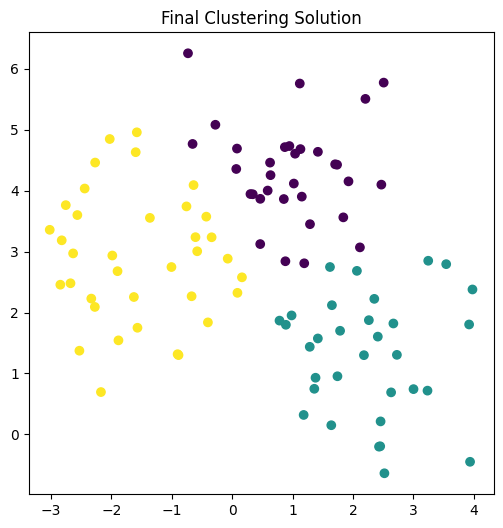

In [ ]:
# final clustering solution
hc = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='average')
final_labels = hc.fit_predict(1 - co_assoc_matrix)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=final_labels, cmap='viridis')
plt.title('Final Clustering Solution')
plt.show()